**Reference**:
- [MarinStatsLecture: Odd ratios, Relative Risk and Risk Difference](https://www.youtube.com/watch?v=JmuciUfCJ_w&list=PLqzoL9-eJTNBq-C2sh46hYIlZYJ0Z1cIB&index=18)
- [StatQuest: Odds and log odds](https://www.youtube.com/watch?v=ARfXDSkQf1Y)
- [StatQuest: Odds Ratio and log of odds ratio](https://www.youtube.com/watch?v=8nm0G-1uJzA&t=863s)

# 1. Oods and log oods

## 1.1 Oods

$$odds = \frac{success}{failure} = \frac{success}{1 - success} = \frac{p(x)}{1 - p(x)}$$

For example, The probabily Real Marid wins against Liverpool is 0.75. The odd for Real Marid wins against Liverpool is $\frac{0.75}{0.25} = \frac{3}{1}$. It means for 1 match lost, Real Marid will have 3 match win against Liverpool

## 1.2 Log oods

Turn multiplicity into additive, make things symmetrical, easier to interpret. See [StatQuest: odds and log odds](https://www.youtube.com/watch?v=ARfXDSkQf1Y) for visualization

## 1.3 Sampling distribution of log oods

Approximately normal. So we can make inference (like **confidence interval**, **hypothesis testing**, ...). Useful for solving certain statistical problems. Specifically, ones where we try to determine the probability of true/false, win/lose, yes/no types of situations.

$$X \sim bernoulli(\lambda = 0.3)$$

In [25]:
set.seed(42)
lambda <- 0.3
nsims <- 10000
sample_size <- 50
true_log_oods <- log(lambda / (1 - lambda))

simulated_log_oods <- replicate(nsims, {
    sample_data <- rbinom(sample_size, size = 1, prob = lambda)
    lambda_hat <- mean(sample_data)
    odds <- lambda_hat / (1 - lambda_hat)
    log(odds)
})

In [28]:
mean(simulated_log_oods)
true_log_oods

[1] -0.8648671

[1] -0.8472979

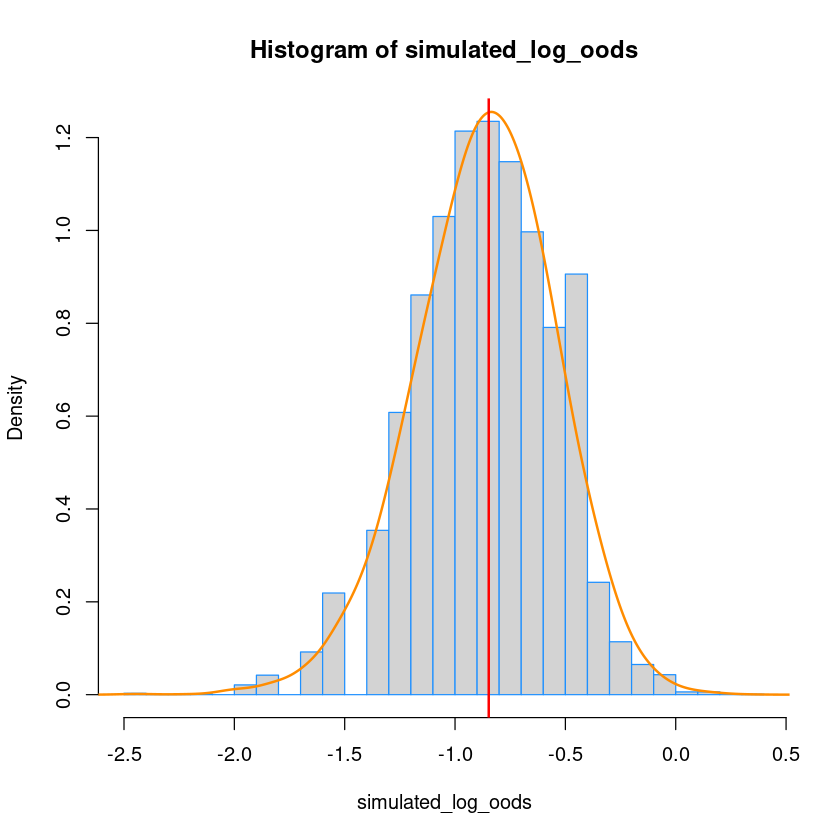

In [29]:
hist(simulated_log_oods, breaks = 20, prob = T, border = "dodgerblue")
lines(density(simulated_log_oods, adjust = 2), col = "darkorange", lwd = 2)
abline(v = true_log_oods, lwd = 2, col = "red")

# 2. Oods ratio and log oods ratio

## 2.1 Why?

**Why**: Using oods ratio to determine the relationship between 2 categorical variables

Oods ratio: The ratio of oods

The distribution of log odd ratio is approximately normal (**Wald Test** take advantage of this fact)

## 2.2. Calculation

In [36]:
cancer <- matrix(c(23, 6, 117, 210), nrow = 2, dimnames = list(`has mutated gene` = c("Yes", "No"), `has cancer` = c("Yes", "No")))
print(cancer)

                has cancer
has mutated gene Yes  No
             Yes  23 117
             No    6 210


The oods ratio of cancer people having mutated gene and cancer people not having mutated gene:

In [47]:
# the odds of cancer people having mutated gene
odds_cancer_mutate <- 23 / 117
# the odds of cancer people not having mutated gene
odds_cancer_not_mutate <- 6 / 210

# odd ratio 
odds_cancer_mutate / odds_cancer_not_mutate

[1] 6.880342

## 2.3 Interpretation

The odds of cancer people having mutated genes is 6.88 times more likely then the odds of cancer people not having mutated genes. Large value means there is a strong relationship between 2 categorical variables

## 2.4 Hypothesis testing for the significance of the relationship

3 ways:
- Fisher's Exact Test
- Chi-squared Test
- Wald Test

### 2.4.1 Fisher's exact Test

$H_0: odd ratio = 1$  
$H_1: odd ratio \ne 1$

In [53]:
fisher.test(cancer)


	Fisher's Exact Test for Count Data

data:  cancer
p-value = 1.099e-05
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  2.613152 21.139349
sample estimates:
odds ratio 
  6.842952 


We reject $H_0$ at 0.05 significant level

### 2.4.2 Chi-squared Test

$H_0$: Mutated gene and having cancer are independent  
$H_1$: Mutated gene and having cancer are dependent

In [54]:
chisq.test(cancer)


	Pearson's Chi-squared test with Yates' continuity correction

data:  cancer
X-squared = 19.369, df = 1, p-value = 1.077e-05


### 2.4.3 Wald Test

$H_0$ : log(ood ratio) = 0  
$H_1$: log(odd ratio) $\ne$ 0

## 2.5 R package for odd ratio

In [58]:
# using this package to caclutae odd ratio, relative risk, risk difference
library(epiR)

In [43]:
epi.2by2(cancer, conf.level = .99)

             Outcome +    Outcome -      Total        Inc risk *        Odds
Exposed +           23          117        140             16.43      0.1966
Exposed -            6          210        216              2.78      0.0286
Total               29          327        356              8.15      0.0887

Point estimates and 99% CIs:
-------------------------------------------------------------------
Inc risk ratio                               5.91 (1.88, 18.63)
Odds ratio                                   6.88 (2.04, 23.25)
Attrib risk *                                13.65 (5.09, 22.22)
Attrib risk in population *                  5.37 (0.65, 10.08)
Attrib fraction in exposed (%)               83.09 (46.75, 94.63)
Attrib fraction in population (%)            65.90 (14.71, 86.37)
-------------------------------------------------------------------
 Test that OR = 1: chi2(1) = 21.154 Pr>chi2 = <0.001
 Wald confidence limits
 CI: confidence interval
 * Outcomes per 100 population unit

In [42]:
names(epi.2by2(cancer))

[1] "method"     "n.strata"   "conf.level" "res"        "massoc"    
[6] "tab"

# 3. Relative Risk (Attribute Risk)

## 3.1 Formula

In [61]:
p_cancer_mutated <- 23 / (23 + 117)
p_cancer_not_mutated <- 6 / (6 + 210)

In [62]:
relative_risk <- p_cancer_mutated / p_cancer_not_mutated
relative_risk

[1] 5.914286

## 3.2 Interpretation

people who have mutated genes are 5.9 times more likely to have cancer than people who do not have mutated genes

# 4. Risk Difference

## 4.1 Formula

The risk difference of cancer people having mutated gene and cancer people not having mutated gene:

In [64]:
risk_difference <- p_cancer_mutated - p_cancer_not_mutated
risk_difference

[1] 0.1365079

## 4.2 Interpretation

people having mutated genes is 13.65% more likely to have cancer than people who do not have mutated genes